# Preprocessing showoff

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np


import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn-v0_8')
# plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

Keep using AAPL data

## Load Data

In [2]:
df = pd.read_csv("/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/AAPL_data_adj_rtn.csv", index_col= 'Date')

df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-03,0.844981,NaN,NaN
2000-01-04,0.773741,-0.084310,-0.088077
2000-01-05,0.785063,0.014633,0.014527
2000-01-06,0.717125,-0.086538,-0.090514
2000-01-07,0.751094,0.047369,0.046281


## Find Outliers with Respect to Simple Return

The **simple return** on a stock is a measure that indicates how much the value of the investment has increased or decreased over a period relative to the initial investment. It is calculated using the following formula:

$$ \text{Simple Return} = \frac{P_{\text{end}} - P_{\text{start}}}{P_{\text{start}}} $$

Where:
- $P_{\text{start}}$ is the price of the stock at the beginning of the period.
- $P_{\text{end}}$ is the price of the stock at the end of the period.

Simple returns are useful for identifying performance trends and potential outliers in stock data, providing insights into periods of exceptional gains or losses.

In [3]:
#compute a mean and std over 21 elemenets for the simple_rtn and add it to the dataset
#THIS IS A MOVING AVERAGE!
df_rolling = df[['simple_rtn']].rolling(window=21).agg(['mean', 'std']) 

df_rolling.columns = df_rolling.columns.droplevel()

df_outliers = df.join(df_rolling)

In [4]:
#this must have nans since the first 21 elements cannot be in the moving average
df_rolling.head(25)

,mean,std
Date,,
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-10,NaN,NaN
2000-01-11,NaN,NaN
2000-01-12,NaN,NaN
2000-01-13,NaN,NaN


In [5]:
def indentify_outliers(row, n_sigmas=3):
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']

    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1 
    else:

        return 0

In [6]:
df_outliers["outliers"] = df_outliers.apply(indentify_outliers, axis = 1)

outliers = df_outliers.loc[df_outliers["outliers"] == 1, ["simple_rtn"]]

Attention to the ghost effect as the outliers enter the moving averages and std!

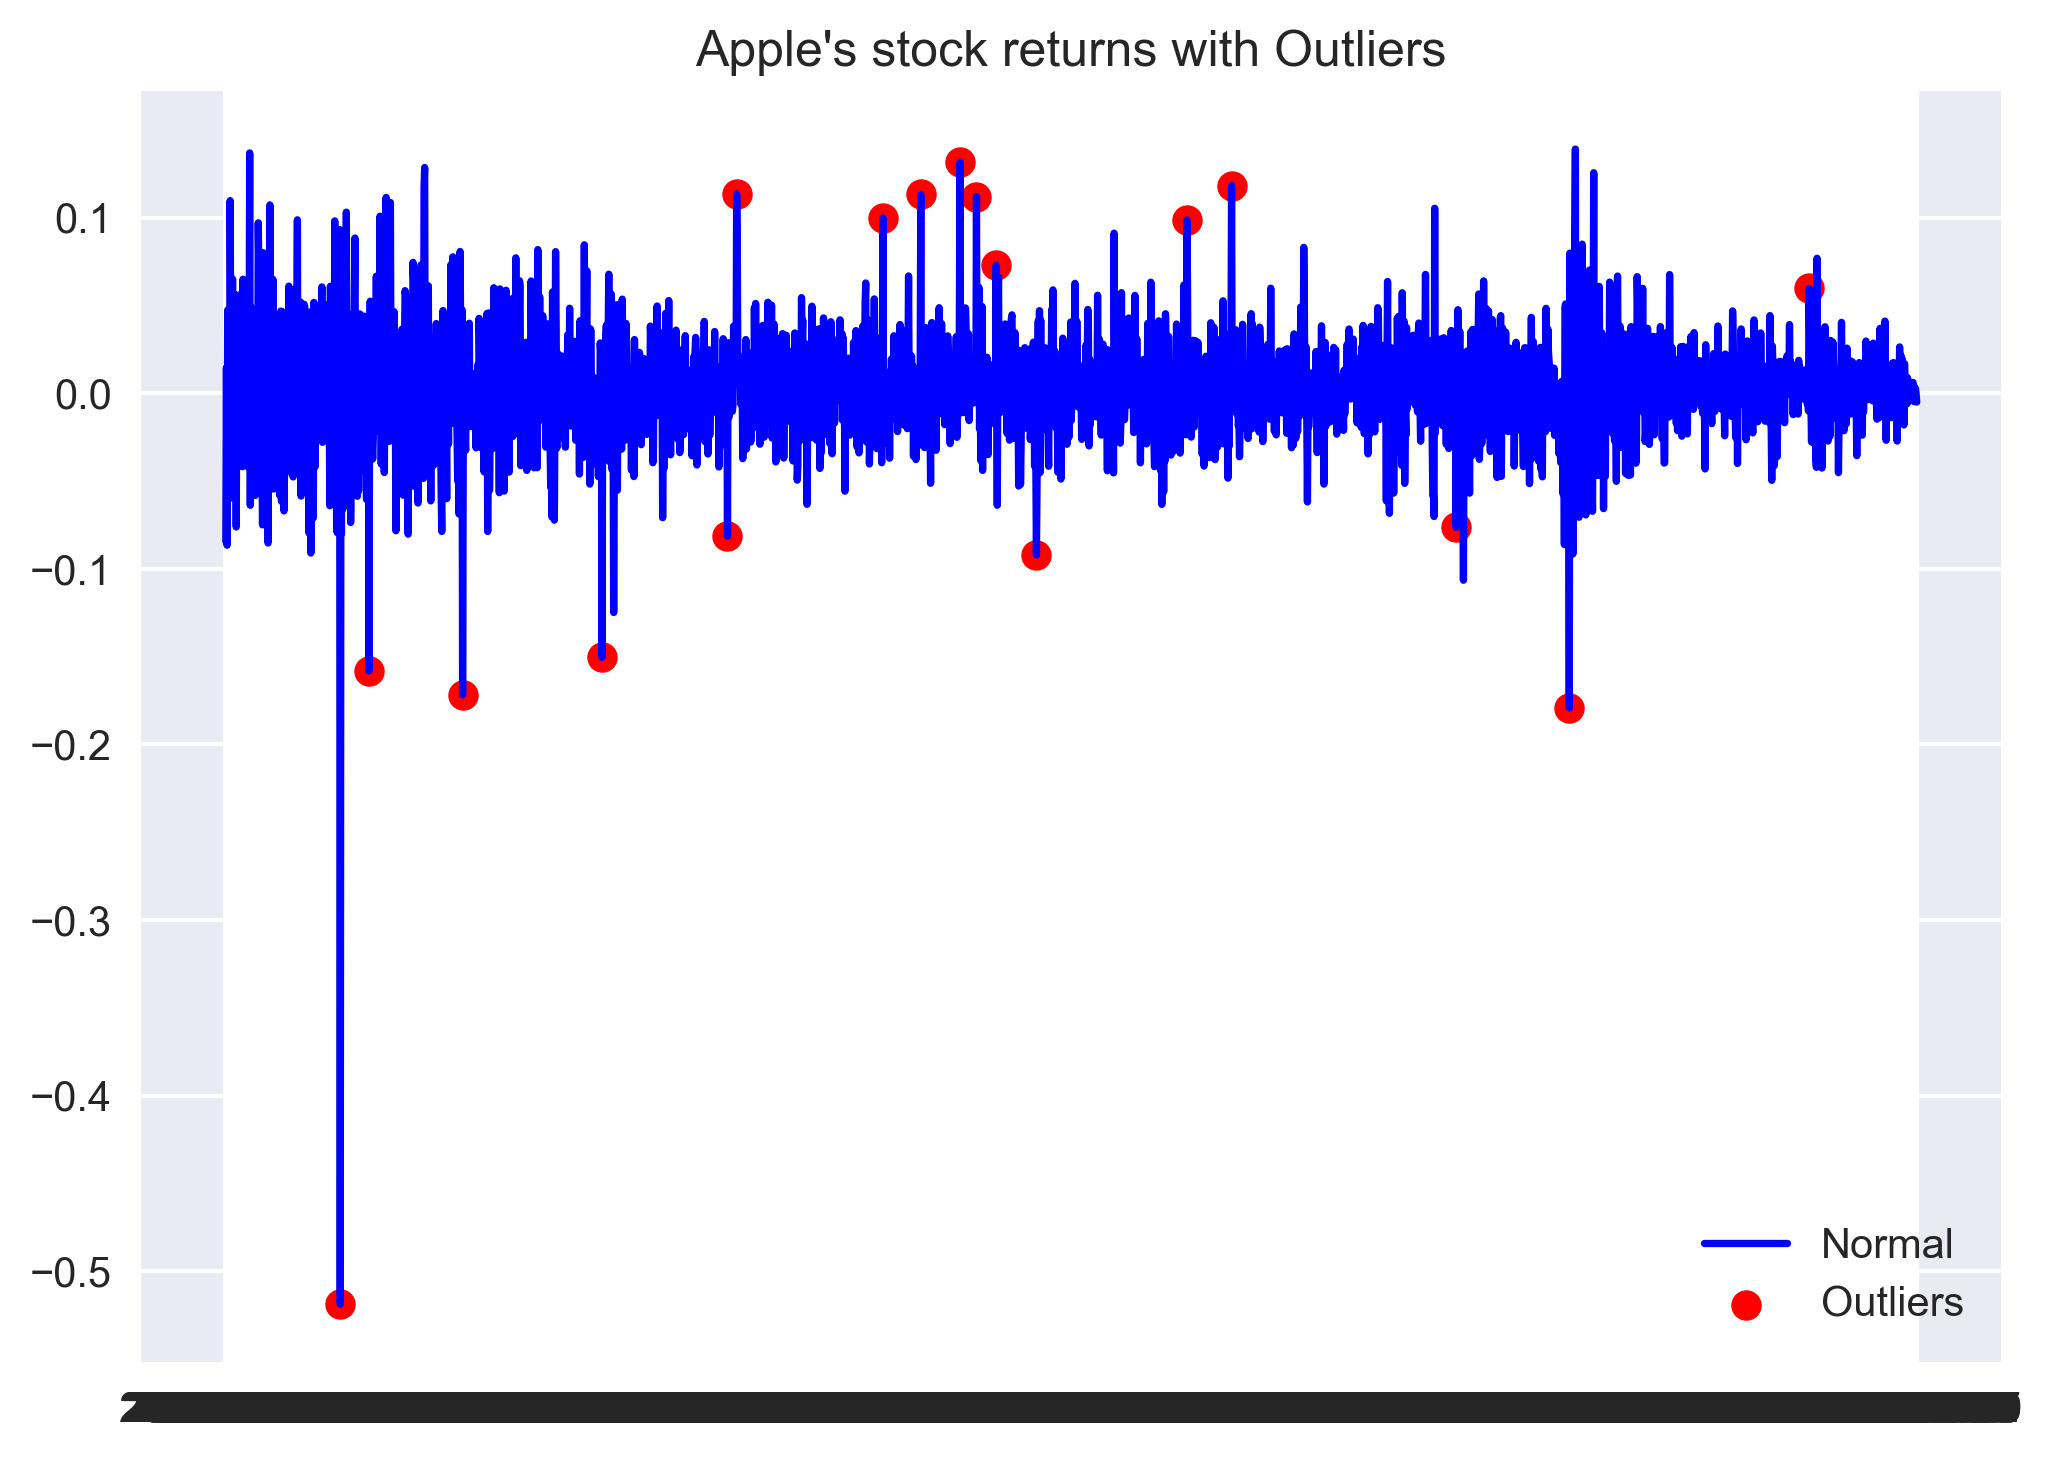

In [7]:
fix, ax = plt.subplots()

ax.plot(df_outliers.index, df_outliers.simple_rtn, color = "blue", label = "Normal")
ax.scatter(outliers.index, outliers.simple_rtn, color = "red", label = "Outliers")

ax.set_title("Apple's stock returns with Outliers") 
ax.legend(loc='lower right')

## Stylized facts

I wanna use another dataset, so like they do in the book I am going to use S&P500 (NOT A STOCK anymore!)

### Fast prepare S&P500 data

In [8]:
import pandas as pd
import yfinance as yf

df_SP500 = yf.download("^GSPC", start = "2014-01-01", end = "2023-12-31", progress = True, actions = "inline")
df_SP500.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df_SP500.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,adj_close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,0.0,0.0
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,0.0,0.0
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,0.0,0.0
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,0.0,0.0
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,0.0,0.0


I wanna work the simple returns from the adj close so it's better since it accounts for dividends

In [9]:
df_SP500['simple_rtn'] = df_SP500.adj_close.pct_change()
df_SP500['log_rtn'] = np.log(df_SP500.adj_close/df_SP500.adj_close.shift(1))

df_SP500.head()

,Open,High,Low,Close,adj_close,Volume,Dividends,Stock Splits,simple_rtn,log_rtn
Date,,,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,0.0,0.0,NaN,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,0.0,0.0,-0.000333,-0.000333
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,0.0,0.0,-0.002512,-0.002515
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,0.0,0.0,0.006082,0.006063
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,0.0,0.0,-0.000212,-0.000212


In [10]:
df_SP500.to_csv('/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/SP500_plus_returns.csv', index=True)

In [11]:
df_SP500 = pd.read_csv("/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/SP500_plus_returns.csv", index_col= 'Date')

df_SP500.head()

,Open,High,Low,Close,adj_close,Volume,Dividends,Stock Splits,simple_rtn,log_rtn
Date,,,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,0.0,0.0,NaN,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,0.0,0.0,-0.000333,-0.000333
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,0.0,0.0,-0.002512,-0.002515
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,0.0,0.0,0.006082,0.006063
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,0.0,0.0,-0.000212,-0.000212


In [12]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats as scs 
import statsmodels.api as sm 
import statsmodels.tsa.api as smt

In [13]:
def compute_pdf(df):
    """
    Computes the probability density function (PDF) for the logarithmic returns.

    Args:
    df : pandas.DataFrame
        DataFrame containing the logarithmic returns under the column 'log_rtn'.

    Returns:
    tuple
        A tuple containing:
        - r_range (np.ndarray): Range of returns values.
        - mu (float): Mean of the logarithmic returns.
        - sigma (float): Standard deviation of the logarithmic returns.
        - norm_pdf (np.ndarray): Computed normal PDF values for the range.
    """
    
    # Calculate the range of return values
    r_range = np.linspace(df.log_rtn.min(skipna=True), df.log_rtn.max(skipna=True), num=1000) 
    
    # Calculate the mean of the logarithmic returns
    mu = df.log_rtn.mean()
    
    # Calculate the standard deviation of the logarithmic returns
    sigma = df.log_rtn.std() 
    
    # Calculate the normal probability density function over the range
    norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)
    
    return r_range, mu, sigma, norm_pdf


### PLOT non gaussian distribution of returns test

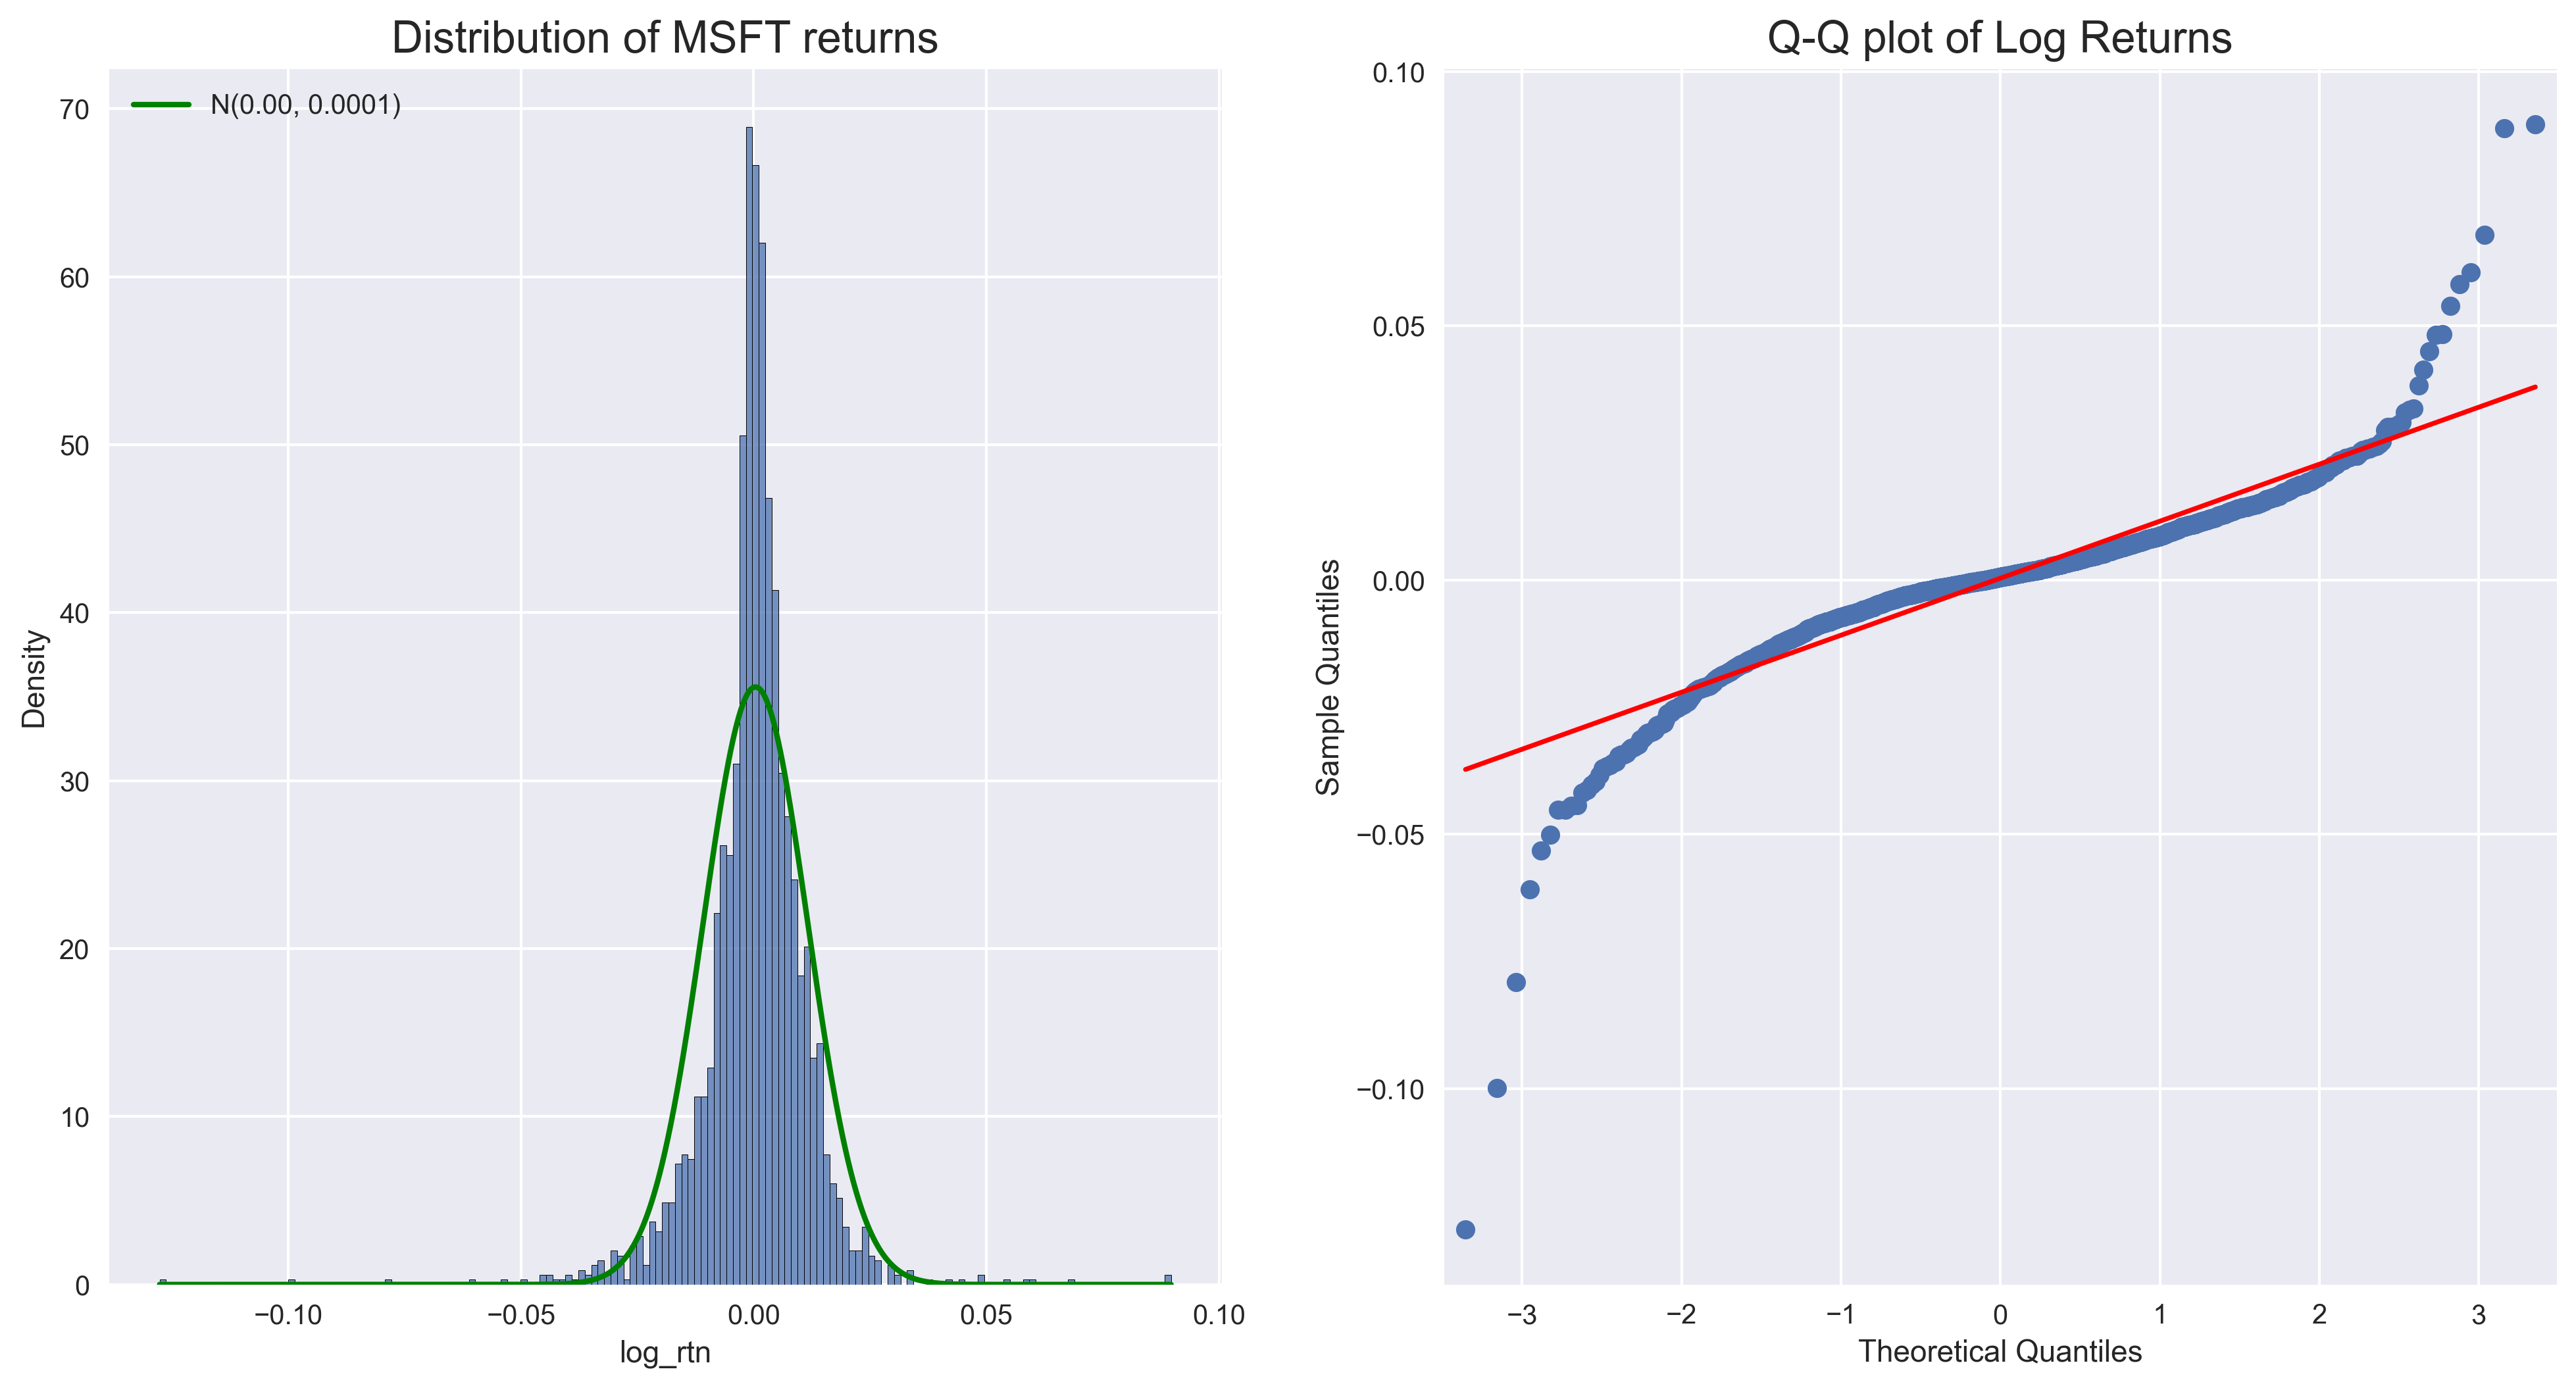

In [14]:
r_range, mu, sigma, norm_pdf = compute_pdf(df_SP500)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram

sns.histplot(data=df_SP500, x='log_rtn', kde=False, stat='density', ax=ax[0])

ax[0].set_title('Distribution of MSFT returns', fontsize=16)

ax[0].plot(r_range, norm_pdf, 'g-', lw=2, label=f'N({mu:.2f}, {sigma**2:.4f})')  # Adjusted line width for better visibility
ax[0].legend(loc='upper left')

# Q-Q plot


# Assuming 'df_SP500' and 'log_rtn' are defined and ax is an axis from a subplot
qq = sm.qqplot(df_SP500.log_rtn.dropna(), line='s', ax=ax[1])  # Drop NaN values to avoid errors
ax[1].set_title('Q-Q plot of Log Returns', fontsize=16)
ax[1].grid(True)  # Add a grid for easier visualization

plt.show()


In [15]:
# Print descriptive statistics for the 'log_rtn' column
print(df_SP500['log_rtn'].describe())

count    2515.000000
mean        0.000380
std         0.011213
min        -0.127652
25%        -0.003795
50%         0.000598
75%         0.005645
max         0.089683
Name: log_rtn, dtype: float64


In [16]:
# Extended descriptive statistics
print("Skewness: ", df_SP500['log_rtn'].skew())
print("Kurtosis: ", df_SP500['log_rtn'].kurt())

Skewness:  -0.8093170636913624
Kurtosis:  16.078859209970336


### Jarque-Bera Test for Normality

The Jarque-Bera test is a statistical test that measures whether the skewness and kurtosis of a dataset are all consistent with it coming from a normal distribution. The test is particularly useful in scenarios where the normality of the data is a key assumption, such as in many statistical models and financial analyses.

#### Test Details:
- **Null Hypothesis (H0)**: The data is normally distributed.
- **Alternative Hypothesis (H1)**: The data is not normally distributed.

A significant result (typically p-value < 0.05) leads to the rejection of the null hypothesis, suggesting that the data do not follow a normal distribution. The test outputs two key metrics:
- **Test Statistic**: A larger value indicates greater divergence from normality.
- **P-value**: A measure of the probability that the observed data would be at least as extreme as it is under the null hypothesis of normality.




In [17]:
import pandas as pd
import scipy.stats as scs

# Assuming df_SP500 is your DataFrame and 'log_rtn' is the column with logarithmic returns
# First, ensure that there are no NaN values that could skew the results
clean_data = df_SP500['log_rtn'].dropna()

# Compute the Jarque-Bera test
jb_test_stat, jb_p_value = scs.jarque_bera(clean_data)

print("Jarque-Bera test statistic:", jb_test_stat)
print("P-value of the test:", jb_p_value)

Jarque-Bera test statistic: 27250.410325186684
P-value of the test: 0.0


In [18]:
def interpret_jarque_bera(jb_test_stat, jb_p_value):
    """
    Interprets the Jarque-Bera test results and provides an explanation.

    Args:
    jb_test_stat (float): The Jarque-Bera test statistic.
    jb_p_value (float): The p-value from the Jarque-Bera test.

    Returns:
    None: Prints out the interpretation of the test results.
    """
    print("Jarque-Bera Test Statistic:", jb_test_stat)
    print("P-value of the Test:", jb_p_value)
    
    # Interpretation based on the p-value
    if jb_p_value < 0.05:
        print("Result: The null hypothesis of normality is rejected.")
        print("Interpretation: The data does not follow a normal distribution.")
    else:
        print("Result: The null hypothesis of normality is not rejected.")
        print("Interpretation: The data is likely to follow a normal distribution.")
    
    # Additional information based on the test statistic
    if jb_test_stat > 6:  # Using 6 as a threshold from chi-square distribution with 2 degrees of freedom
        print("Note: The test statistic is significantly high, suggesting strong evidence against normality.")
    else:
        print("Note: The test statistic does not strongly indicate deviation from normality.")


interpret_jarque_bera(jb_test_stat, jb_p_value)


Jarque-Bera Test Statistic: 27250.410325186684
P-value of the Test: 0.0
Result: The null hypothesis of normality is rejected.
Interpretation: The data does not follow a normal distribution.
Note: The test statistic is significantly high, suggesting strong evidence against normality.


### Cluster Volatility

Here I'm going to visualize period of more volatility in the return

In [19]:
df_SP500.head()

,Open,High,Low,Close,adj_close,Volume,Dividends,Stock Splits,simple_rtn,log_rtn
Date,,,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,0.0,0.0,NaN,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,0.0,0.0,-0.000333,-0.000333
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,0.0,0.0,-0.002512,-0.002515
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,0.0,0.0,0.006082,0.006063
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,0.0,0.0,-0.000212,-0.000212


<Axes: title={'center': 'Daily returns'}, xlabel='Date'>

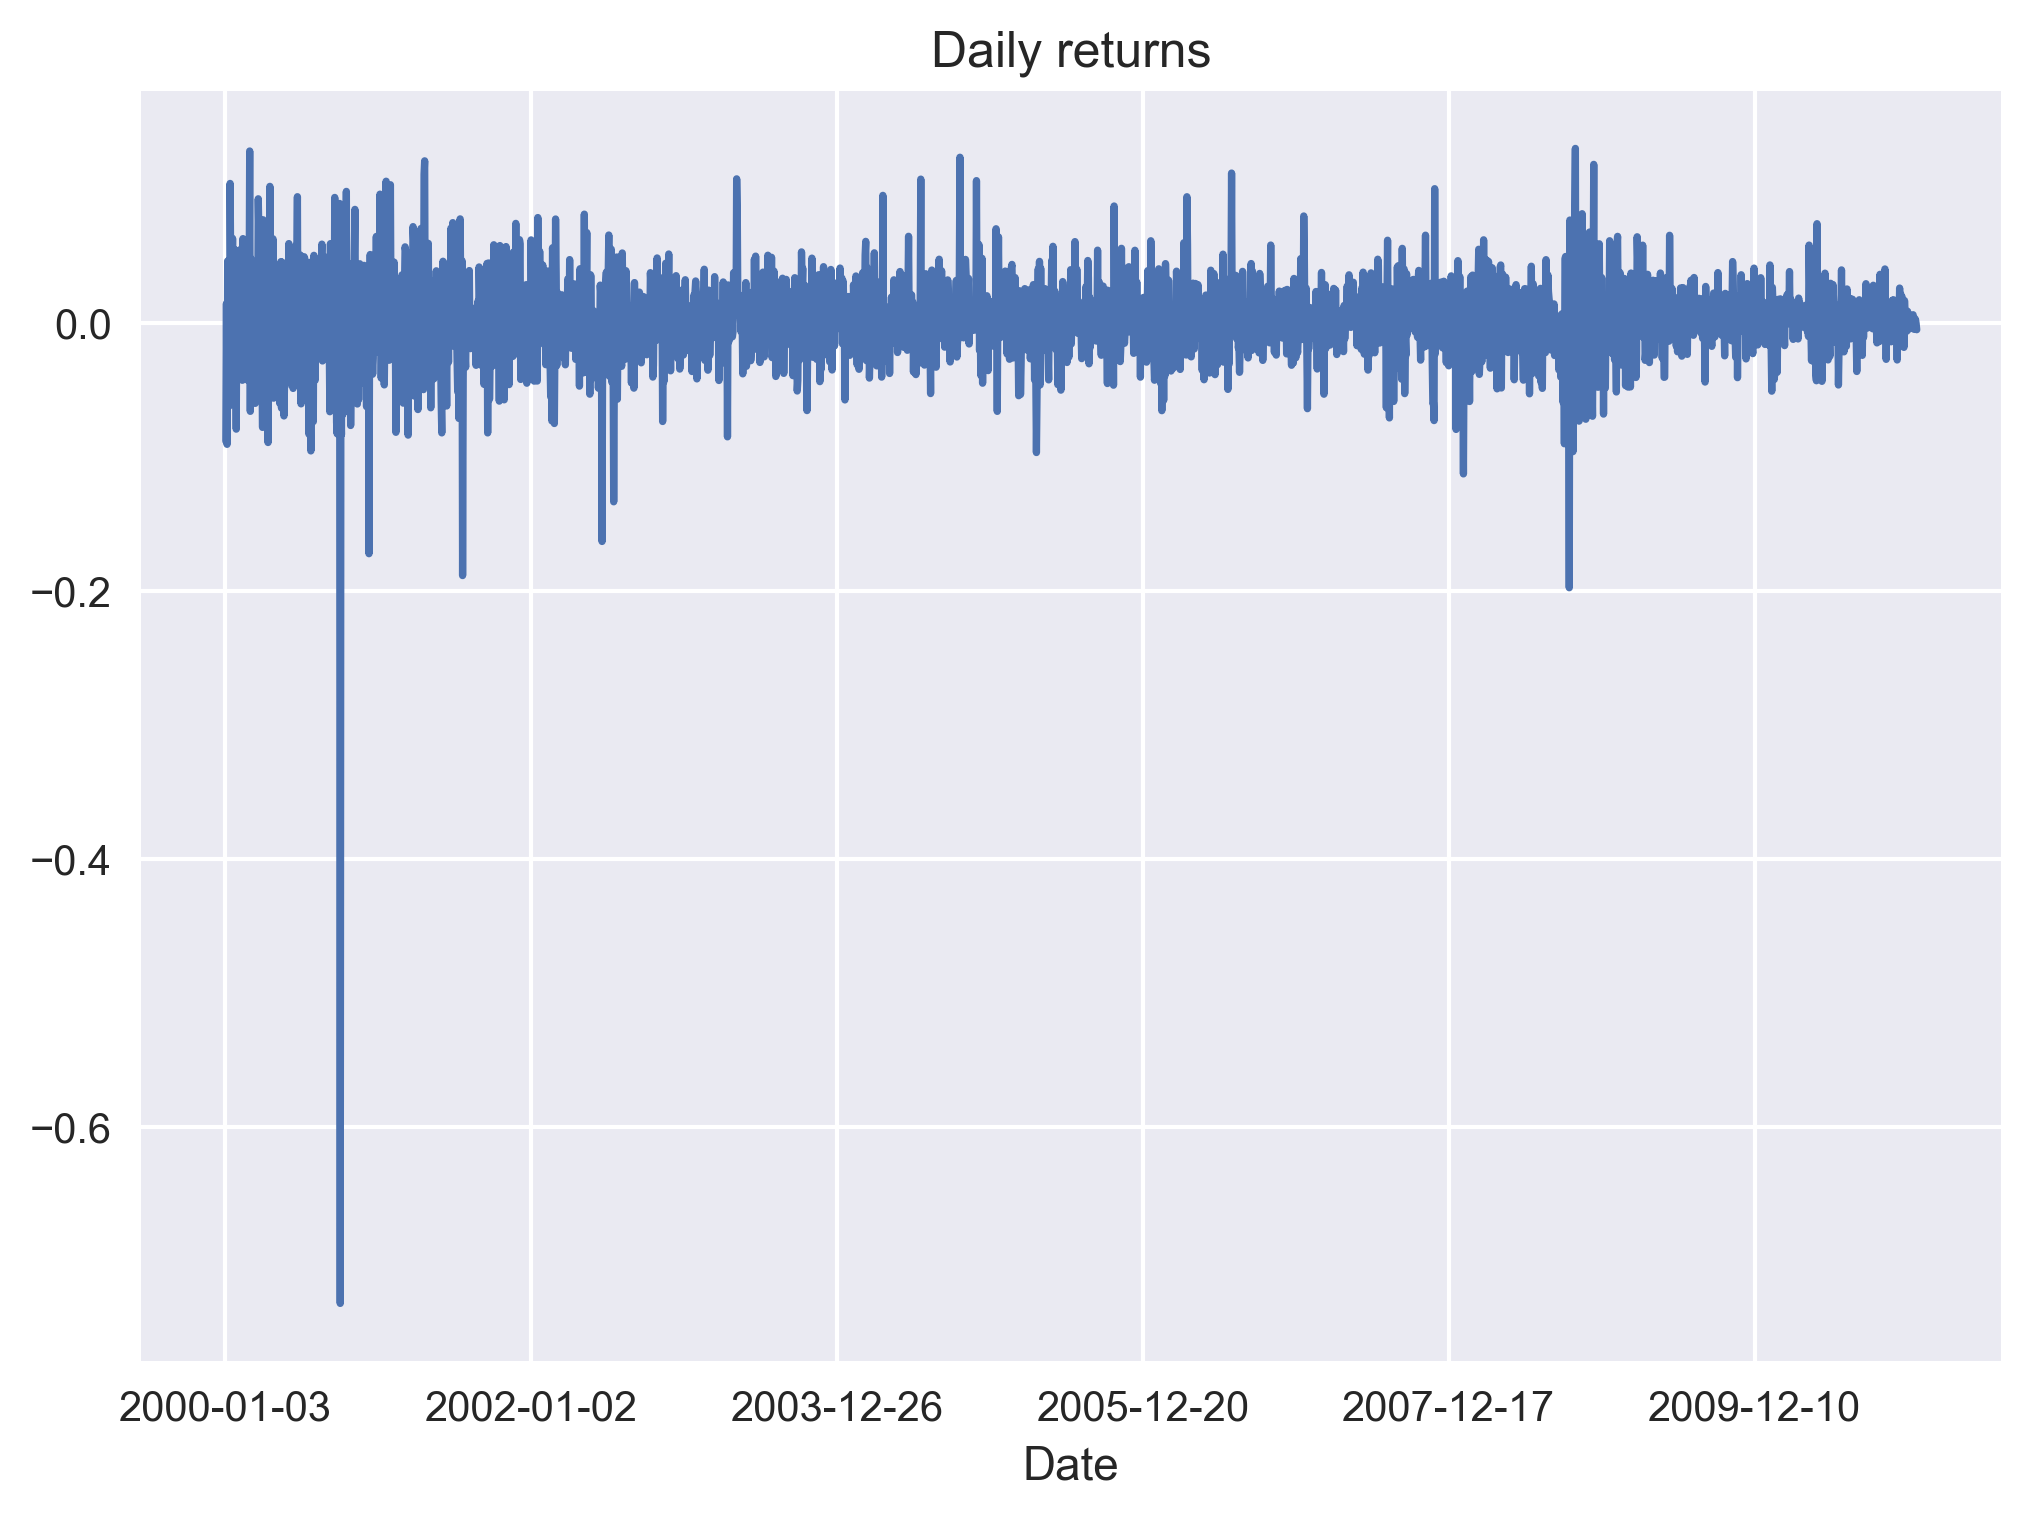

In [20]:
df.log_rtn.plot(title = "Daily returns")

### Study the autocorrelation in the returns

Presence of Autocorrelation:

Positive Autocorrelation: If your stock’s log returns exhibit positive autocorrelation, it means that if the stock price has been rising (or falling), it tends to continue rising (or falling) in the next periods. This pattern suggests a momentum effect where past trends tend to continue.
Negative Autocorrelation: This occurs when increases in log returns are likely to be followed by decreases, and vice versa. This can indicate a "mean-reverting" behavior where the price tends to oscillate around a mean value.
Absence of Autocorrelation:

If there is no autocorrelation in the log returns of a stock, it suggests that the log returns are random, with no link between past and future returns. This is consistent with the "random walk hypothesis," which posits that stock prices are unpredictable and follow a random path.

In [ ]:
N_LAGS = 50
significance_level = 0.05

